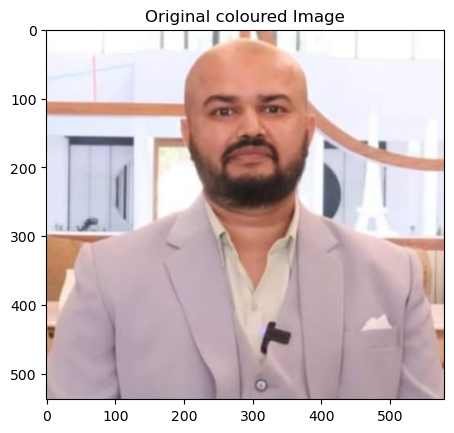

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
import pandas as pd

img = img_as_float(io.imread("Sagar.png"))


plt.imshow(img)
plt.title("Original coloured Image");


In [35]:
print(img)
img.shape

[[[0.97647059 0.97647059 0.97647059 1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[0.97647059 0.97647059 0.97647059 1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 [[0.97647059 0.97647059 0.97647059 1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  ...
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]
  [1.         1.         1.         1.        ]]

 ...

 [[0.74509804 0.6627451  0.69019608 1.        ]
  [0.74117647 0.65490196 0.68627451 1.        ]
  [0.72941

(538, 579, 4)

(-0.5, 578.5, 537.5, -0.5)

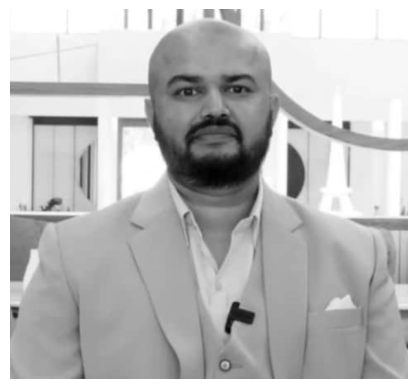

In [36]:
# Converting to grayscale
if img.ndim == 3:
    img = img[:, :, :3]     # Image of Sagar's screenshot had 4 dimensions (4th being alpha); dropping alpha channel
    img_gray = color.rgb2gray(img)
else:
    img_gray = color.rgb2gray(img)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')

In [37]:
print(img_gray)
img_gray.shape

[[0.97647059 1.         1.         ... 1.         1.         1.        ]
 [0.97647059 1.         1.         ... 1.         1.         1.        ]
 [0.97647059 1.         1.         ... 1.         1.         1.        ]
 ...
 [0.68222431 0.67549725 0.66682078 ... 0.7070851  0.69812588 0.69028275]
 [0.68305765 0.67830275 0.67045961 ... 0.71381216 0.70204745 0.69028275]
 [0.68614588 0.67830275 0.67438118 ... 0.71773373 0.70316353 0.69056549]]


(538, 579)

In [38]:
U, S, Vt = np.linalg.svd(img_gray, full_matrices=False)
print(U.shape)
print(S.shape)
print(Vt.shape)

(538, 538)
(538,)
(538, 579)


In [39]:
def reconstruct_k(U, S, Vt, k):
    return (U[:, :k] * S[:k]) @ Vt[:k, :]


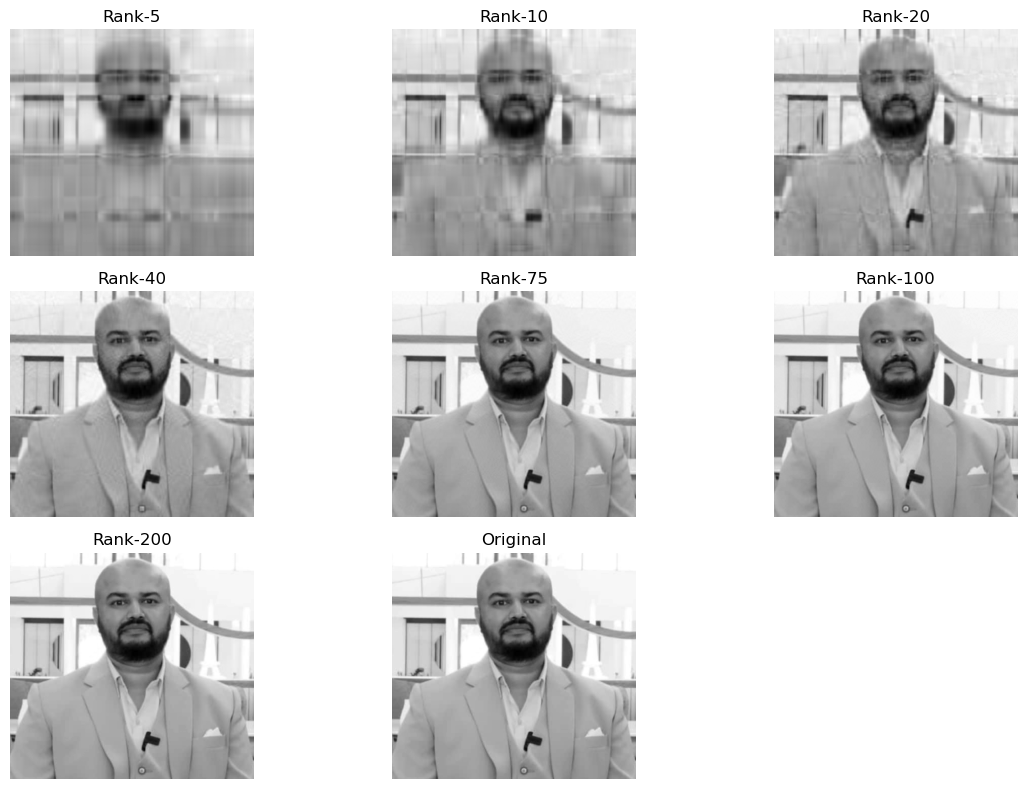

In [40]:
ks = [5, 10, 20, 40, 75, 100, 200]

plt.figure(figsize=(12, 8))

for i, k in enumerate(ks, 1):
    img_k = reconstruct_k(U, S, Vt, k)
    
    plt.subplot(3, 3, i)
    plt.imshow(img_k, cmap='gray')
    plt.title(f"Rank-{k}")
    plt.axis('off')

plt.subplot(3, 3, len(ks) + 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.tight_layout()
plt.show()


(-0.5, 578.5, 537.5, -0.5)

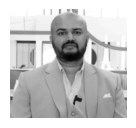

In [41]:
k=400
img_k = reconstruct_k(U, S, Vt, k)
    
plt.subplot(3, 3, i)
plt.imshow(img_k, cmap='gray')
plt.axis('off')


In [42]:
def frobenius_error(A, A_k):
    return np.linalg.norm(A - A_k, 'fro') #Eckart–Young–Mirsky theorem: The best rank-k approximation (in Frobenius norm) is obtained by truncating the SVD


In [43]:
def psnr(original, reconstructed): #Peak Signal-to-Noise Ratio
    mse = np.mean((original - reconstructed) ** 2)
    if mse == 0:
        return float('inf')
    return 10 * np.log10(1.0 / mse) # Assuming pixel values are in [0, 1]; it would be 255^2/ mse for [0, 255]


In [44]:
fro_errors = []
psnr_values = []

for k in ks:
    A_k = reconstruct_k(U, S, Vt, k)

    f_err = frobenius_error(img_gray, A_k)
    p = psnr(img_gray, A_k)

    fro_errors.append(f_err)
    psnr_values.append(p)

    print(f"k = {k:3d} | Frobenius Error = {f_err:.4f} | PSNR = {p:.4f} dB")


k =   5 | Frobenius Error = 37.4364 | PSNR = 23.4687 dB
k =  10 | Frobenius Error = 25.2575 | PSNR = 26.8868 dB
k =  20 | Frobenius Error = 14.7411 | PSNR = 31.5640 dB
k =  40 | Frobenius Error = 7.1191 | PSNR = 37.8862 dB
k =  75 | Frobenius Error = 2.6927 | PSNR = 46.3309 dB
k = 100 | Frobenius Error = 1.5202 | PSNR = 51.2965 dB
k = 200 | Frobenius Error = 0.2682 | PSNR = 66.3669 dB


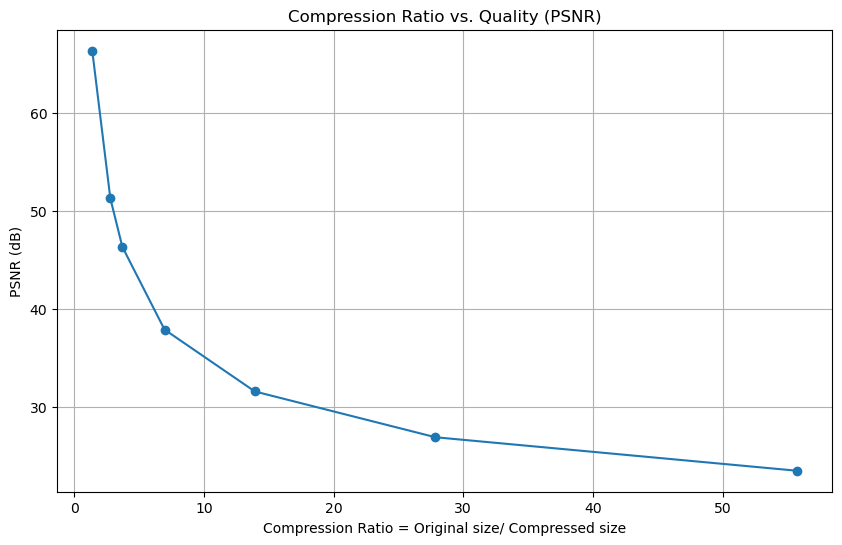

In [45]:
m, n = img_gray.shape
compression_ratios = []
psnrs = []

for k in ks:
    original_size = m * n
    compressed_size = k * (m + n + 1)   # U: mk; V: nk; S: k
    compression_ratio = original_size/compressed_size


    img_k = reconstruct_k(U, S, Vt, k)
    psnr_k = psnr(img_gray, img_k)

    compression_ratios.append(compression_ratio)
    psnrs.append(psnr_k)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(compression_ratios, psnrs, marker='o')
plt.xlabel("Compression Ratio = Original size/ Compressed size")
plt.ylabel("PSNR (dB)")
plt.title("Compression Ratio vs. Quality (PSNR)")
plt.grid(True)
plt.show()

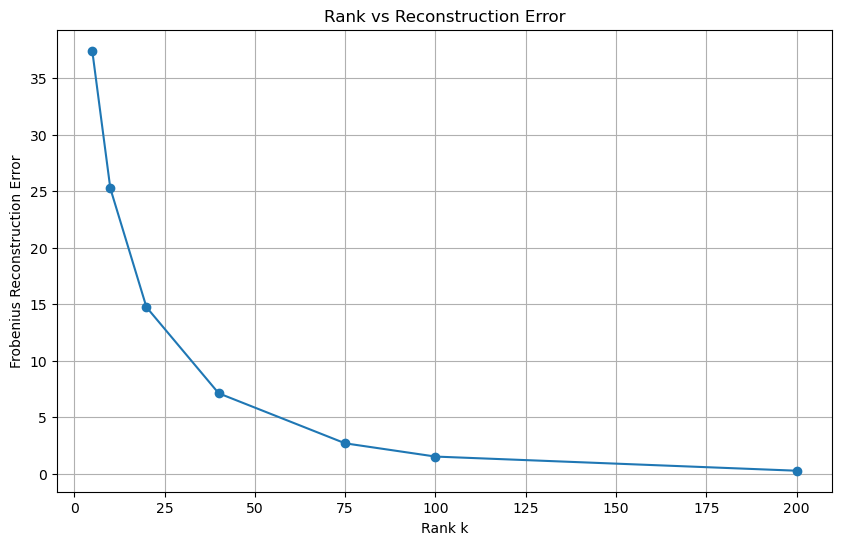

In [46]:
frobenius_errors = []

for k in ks:
    img_k = reconstruct_k(U, S, Vt, k)
    error = np.linalg.norm(img_gray - img_k, 'fro')
    frobenius_errors.append(error)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ks, frobenius_errors, marker='o')
plt.xlabel("Rank k")
plt.ylabel("Frobenius Reconstruction Error")
plt.title("Rank vs Reconstruction Error")
plt.grid(True)
plt.show()

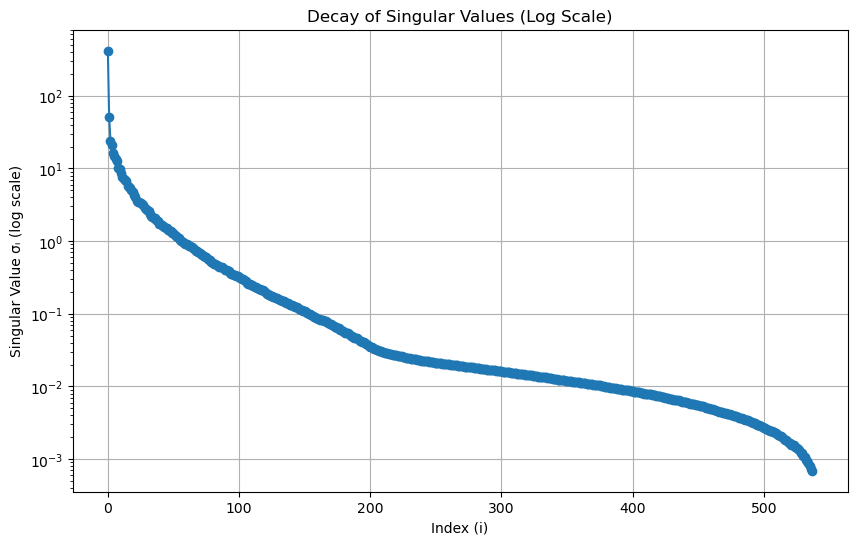

In [47]:
plt.figure(figsize=(10, 6))
plt.semilogy(S, marker='o')   # log scale on y-axis
plt.xlabel("Index (i)")
plt.ylabel("Singular Value σᵢ (log scale)")
plt.title("Decay of Singular Values (Log Scale)")
plt.grid(True)
plt.show()

Update after presentation, implementing comments from Sagar:

1. Apply SVD to each channel (R,G,B) individually and then merge
2. Use PIL instead of Matplotlib

In [48]:
import numpy as np
from PIL import Image

img2 = 'Sagar.png'  
K = 50


In [49]:
def svd_compress_channel(channel_matrix, k):
    U, S, Vt = np.linalg.svd(channel_matrix, full_matrices=False)
    reconstructed_channel = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
    reconstructed_channel = np.clip(reconstructed_channel, 0, 255)
    return S, reconstructed_channel.astype(np.uint8)

In [50]:

img3 = Image.open(img2).convert('RGB')
img_array = np.array(img3)

print(f"Original image shape: {img_array.shape}")



Original image shape: (538, 579, 3)


In [51]:
R_channel = img_array[:, :, 0]
G_channel = img_array[:, :, 1]
B_channel = img_array[:, :, 2]

print(f"Applying SVD with rank k = {K} to each channel...")

S_R, R_compressed = svd_compress_channel(R_channel, K)
S_G, G_compressed = svd_compress_channel(G_channel, K)
S_B, B_compressed = svd_compress_channel(B_channel, K)

compressed_img_array = np.dstack((R_compressed, G_compressed, B_compressed))
compressed_img = Image.fromarray(compressed_img_array)

output_filename = f"compressed_svd_k{K}.png"
compressed_img.save(output_filename)

print(f"SVD Compression Complete")

Applying SVD with rank k = 50 to each channel...
SVD Compression Complete


Now doing the same for varying values of k

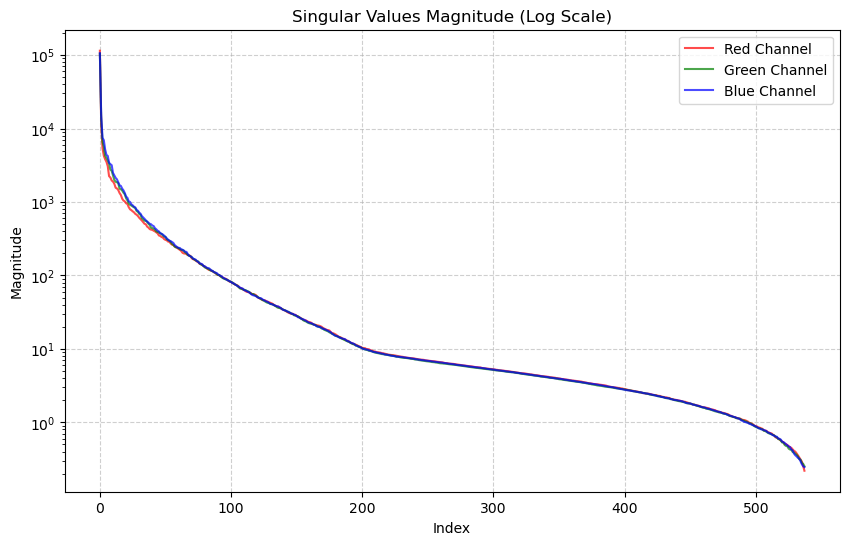

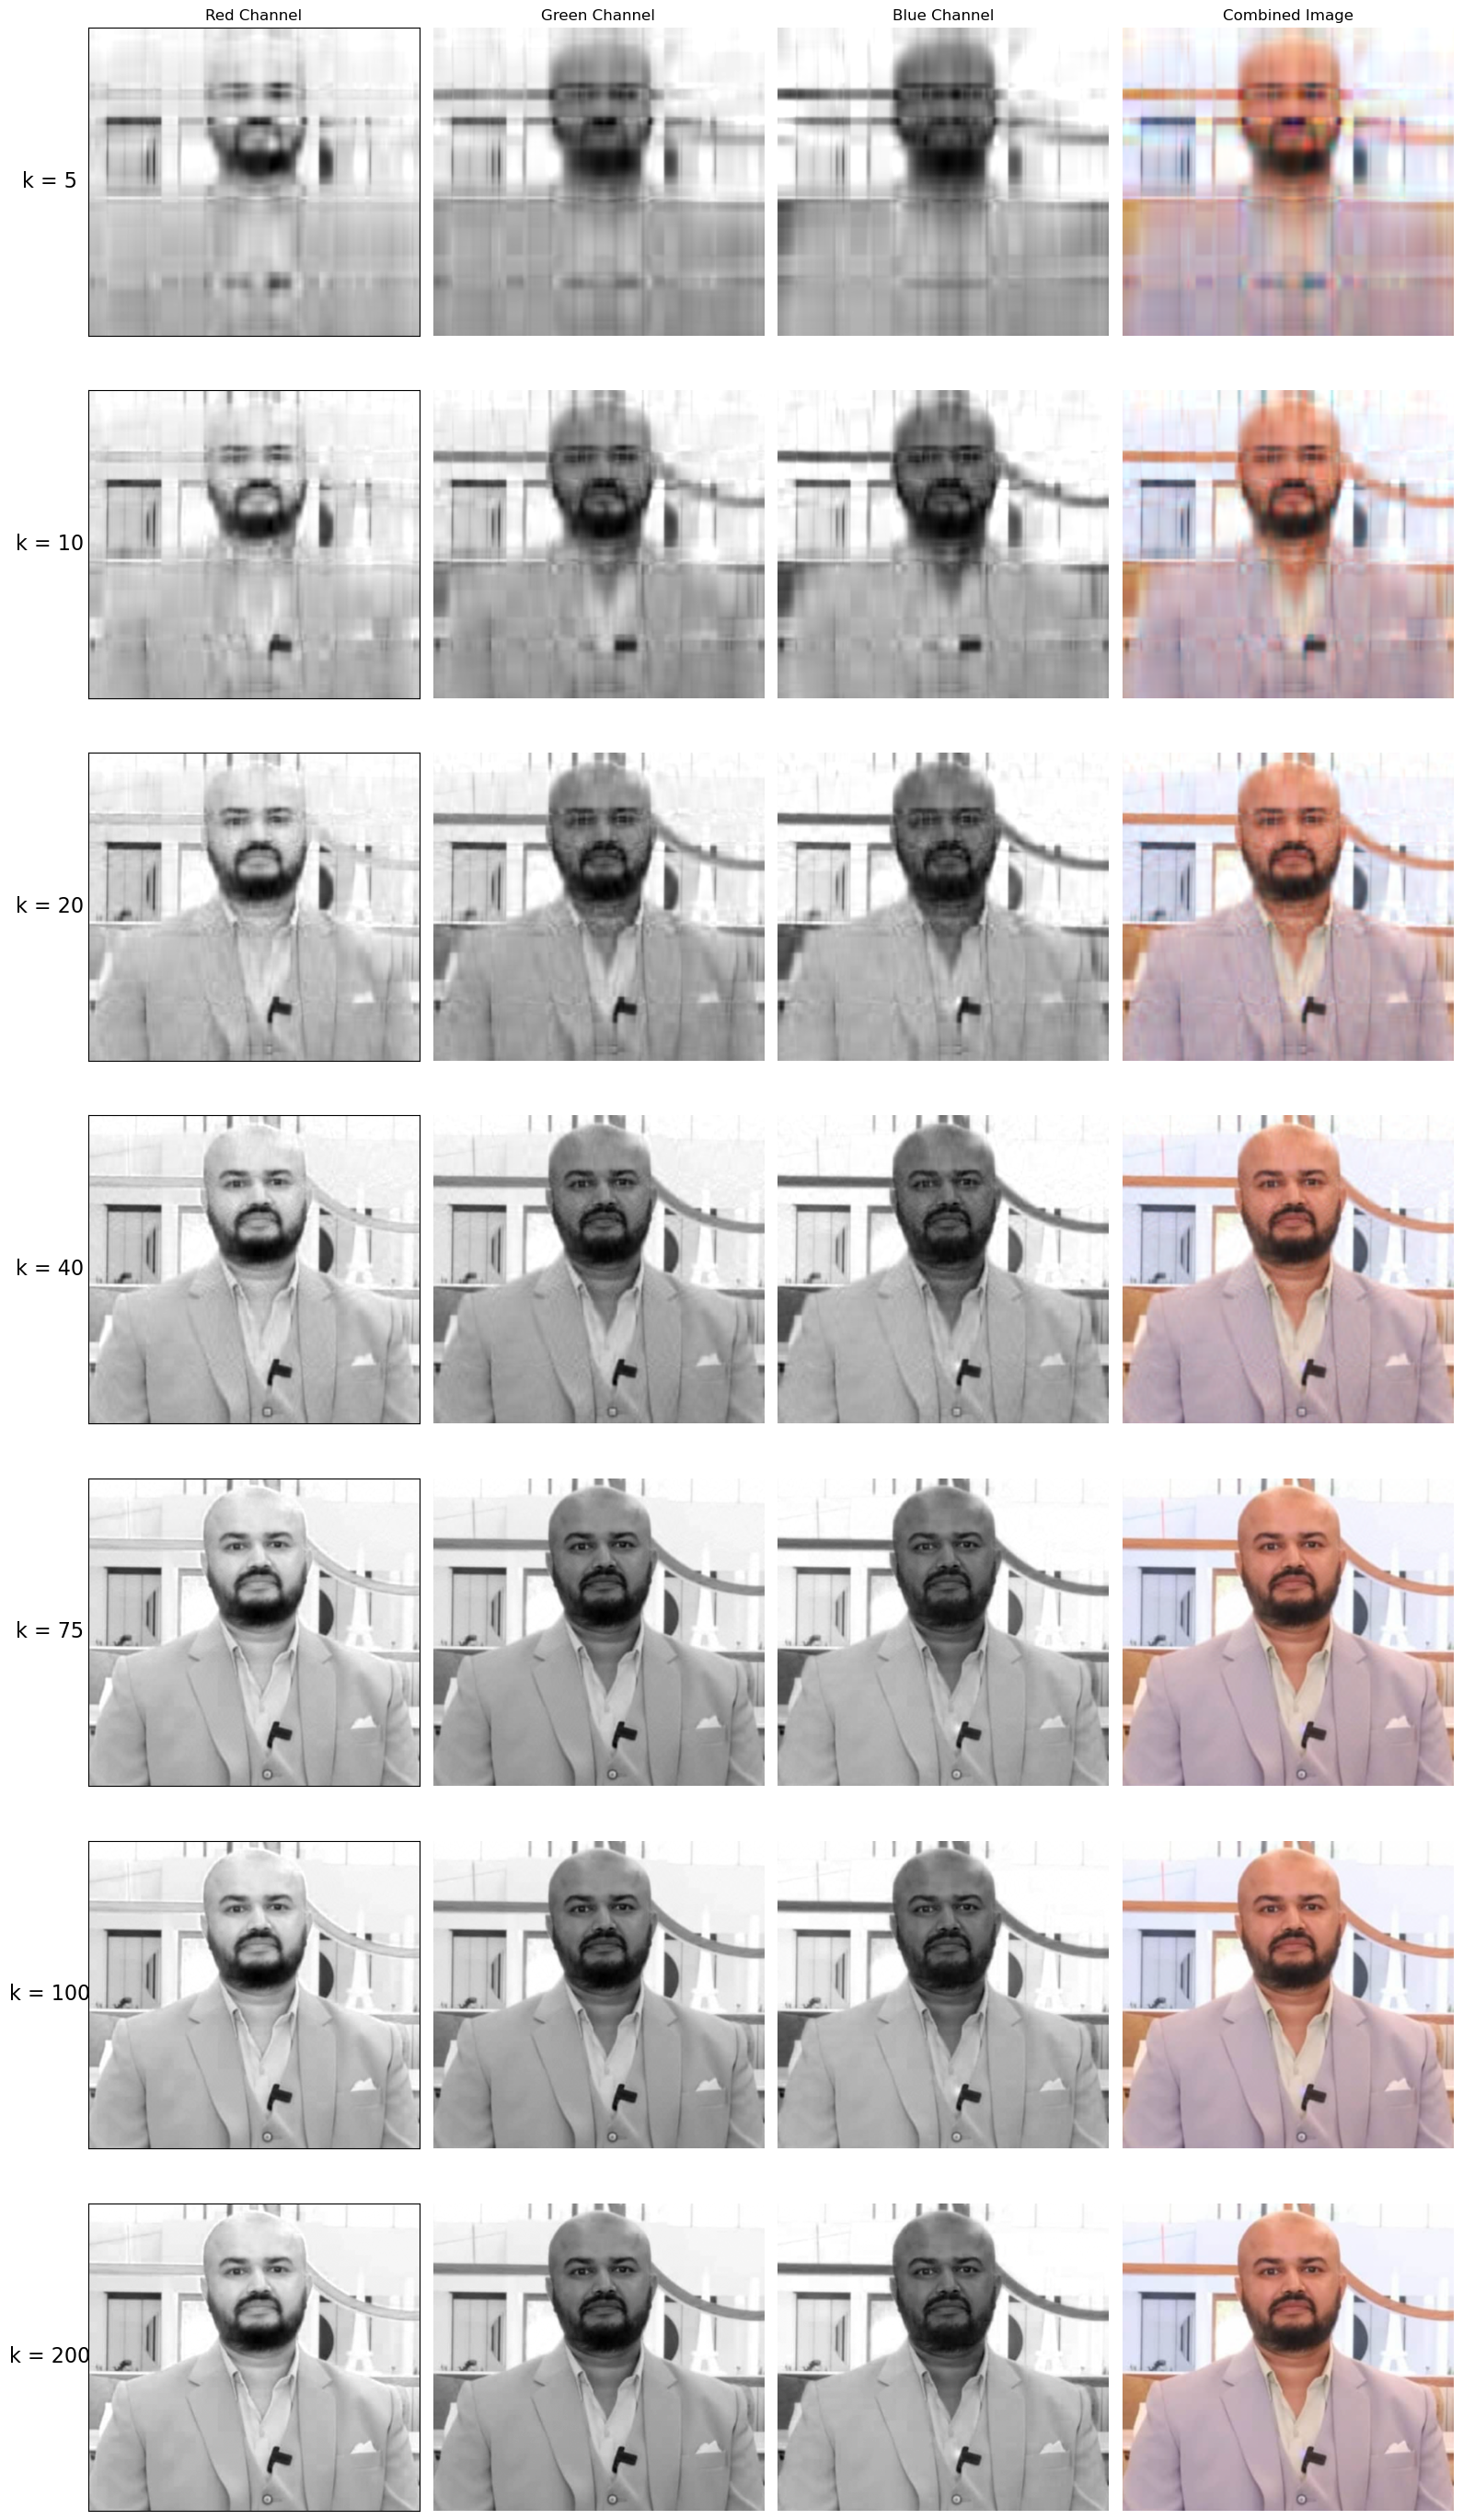

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img_filename = 'Sagar.png'
k_values = [5, 10, 20, 40, 75, 100, 200]

try:
    img = Image.open(img_filename).convert('RGB')
    img_array = np.array(img)

    R_channel = img_array[:, :, 0]
    G_channel = img_array[:, :, 1]
    B_channel = img_array[:, :, 2]

    U_R, S_R, Vt_R = np.linalg.svd(R_channel, full_matrices=False)
    U_G, S_G, Vt_G = np.linalg.svd(G_channel, full_matrices=False)
    U_B, S_B, Vt_B = np.linalg.svd(B_channel, full_matrices=False)
    
    
    plt.figure(figsize=(10, 6))
    plt.plot(S_R, label='Red Channel', color='red', alpha=0.7)
    plt.plot(S_G, label='Green Channel', color='green', alpha=0.7)
    plt.plot(S_B, label='Blue Channel', color='blue', alpha=0.7)
    plt.yscale('log')
    plt.title('Singular Values Magnitude (Log Scale)')
    plt.xlabel('Index')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('svd_singular_values_log.png')
    plt.show()
    
    
    rows = len(k_values)
    cols = 4
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))

    for i, k in enumerate(k_values):
        R_rec = U_R[:, :k] @ np.diag(S_R[:k]) @ Vt_R[:k, :]
        G_rec = U_G[:, :k] @ np.diag(S_G[:k]) @ Vt_G[:k, :]
        B_rec = U_B[:, :k] @ np.diag(S_B[:k]) @ Vt_B[:k, :]

        R_rec = np.clip(R_rec, 0, 255).astype(np.uint8)
        G_rec = np.clip(G_rec, 0, 255).astype(np.uint8)
        B_rec = np.clip(B_rec, 0, 255).astype(np.uint8)

        img_rec = np.dstack((R_rec, G_rec, B_rec))

        axes[i, 0].imshow(R_rec, cmap='gray')
        axes[i, 0].set_ylabel(f'k = {k}', fontsize=16, rotation=0, labelpad=30, va='center')
        if i == 0: axes[i, 0].set_title('Red Channel')
        axes[i, 0].set_xticks([])
        axes[i, 0].set_yticks([])

        axes[i, 1].imshow(G_rec, cmap='gray')
        if i == 0: axes[i, 1].set_title('Green Channel')
        axes[i, 1].axis('off')

        axes[i, 2].imshow(B_rec, cmap='gray')
        if i == 0: axes[i, 2].set_title('Blue Channel')
        axes[i, 2].axis('off')

        axes[i, 3].imshow(img_rec)
        if i == 0: axes[i, 3].set_title('Combined Image')
        axes[i, 3].axis('off')

    plt.tight_layout()
    plt.savefig('svd_detailed_channels_comparison.png')
    plt.show()

except FileNotFoundError:
    print(f"File {img_filename} not found.")
except Exception as e:
    print(f"An error occurred: {e}")